In [1]:
import scipy
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")
from scipy.optimize import curve_fit

# Откроем данные

In [2]:
df = pd.read_excel('covid-russia.xlsx', index_col='Дата')
df

,Выявленные случаи
Дата,
2020-03-17,114
2020-03-18,147
2020-03-19,199
2020-03-20,253
2020-03-21,306
2020-03-22,367
2020-03-23,438
2020-03-24,495
2020-03-25,658


# Построим график

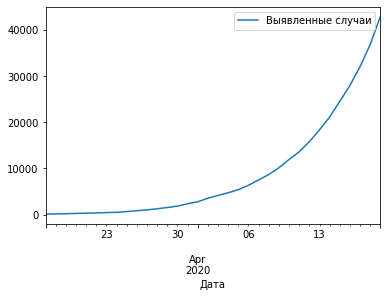

In [3]:
df.plot()

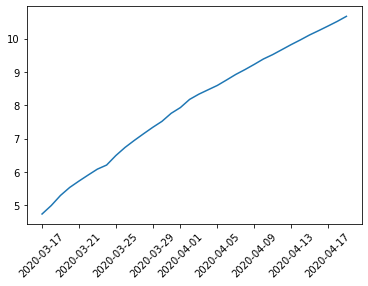

In [4]:
plt.xticks(rotation=45)
plt.plot(np.log(df))

# Регрессия

наша функция зависит от номера дня и от кол-во людей в 0 день

In [5]:
def f(n, x0, a):
    return x0 * (a ** n)

In [6]:
x = range(df.shape[0])
y = df['Выявленные случаи']

In [7]:
popt, pcov = curve_fit(f, x, y)

fit: x0=346.61393500805593, a=1.157369224328398


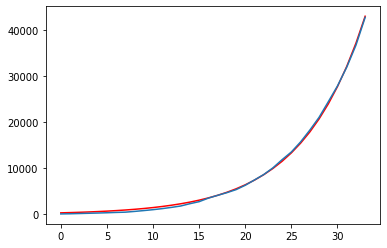

In [8]:
print('fit: x0=%s, a=%s' % tuple(popt))
plt.plot(x, f(x, *popt), 'r-')
plt.plot(x, y)

# Результат

In [9]:
x0, a = tuple(popt)
print(f'x0 = {x0}, a = {a}')

x0 = 346.61393500805593, a = 1.157369224328398


Вопрос: в какую сторону округлять? Введем метрику и посмотрим

In [10]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(f(x, int(x0), a), y))

103772.29321004235


In [11]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(f(x, int(x0) + 1, a), y))

103363.56536548593


# Финальный результат

In [12]:
x0, a = int(x0) + 1, a
print(f'x0 = {x0}, a = {a}')

x0 = 347, a = 1.157369224328398
